## Excercise 1

In the capitalbikeshare folder, there are 6 files that record the rides for the last 6 months of 2022. In order to see any trends in this data, we will need them to be compined into a single dataframe.

a) Create a dataframe that contains all of the rides for the last 6 months of 2022. You may use any libraries you like, but it must be done using Python and not by hand in an external program.

In [5]:
import pandas as pd
import glob

# Path to the directory where your CSV files are located
path = "C:/Users/sangh/OneDrive/Desktop/wk06_level1_cleaning/capitalbikeshare/"

# Use glob to get all CSV files in the directory
csv_files = glob.glob(path + '*.csv')
print(csv_files)

# Create an empty list to hold the dataframes
dfs = []

# Loop through the CSV files and read them into dataframes
for file in csv_files:
    df = pd.read_csv(file)
    dfs.append(df)

# Concatenate the dataframes into a single dataframe
df = pd.concat(dfs, ignore_index=True)

# Print the combined dataframe
print(df)

['C:/Users/sangh/OneDrive/Desktop/wk06_level1_cleaning/capitalbikeshare\\202207-capitalbikeshare-tripdata.csv', 'C:/Users/sangh/OneDrive/Desktop/wk06_level1_cleaning/capitalbikeshare\\202208-capitalbikeshare-tripdata.csv', 'C:/Users/sangh/OneDrive/Desktop/wk06_level1_cleaning/capitalbikeshare\\202209-capitalbikeshare-tripdata.csv', 'C:/Users/sangh/OneDrive/Desktop/wk06_level1_cleaning/capitalbikeshare\\202210-capitalbikeshare-tripdata.csv', 'C:/Users/sangh/OneDrive/Desktop/wk06_level1_cleaning/capitalbikeshare\\202211-capitalbikeshare-tripdata.csv', 'C:/Users/sangh/OneDrive/Desktop/wk06_level1_cleaning/capitalbikeshare\\202212-capitalbikeshare-tripdata.csv']
                  ride_id  rideable_type           started_at  \
0        023A22990112155D   classic_bike  2022-07-29 18:44:37   
1        AB7451BFA95ADC66   classic_bike  2022-07-22 18:18:54   
2        F3301E3CA0A6F6EA   classic_bike  2022-07-23 13:40:54   
3        245EBE5294DD9136   classic_bike  2022-07-05 16:24:30   
4       

b) Save this DataFrame to a csv file, so that you don't have to re-process the originl files every time you want to work with the data.

In [6]:
df.to_csv('capitalbikeshare.csv')

c) What are the top 5 most common end stations? End stations are where the user ends their journey on the bike.

In [7]:
df['end_station_name'].value_counts().nlargest(5)

Columbus Circle / Union Station    20907
New Hampshire Ave & T St NW        19788
15th & P St NW                     19289
Lincoln Memorial                   18671
Jefferson Dr & 14th St SW          17570
Name: end_station_name, dtype: int64

d) Write code and a visualisation that will answer the question of whether casual riders or member riders are frequenting the same end stations.

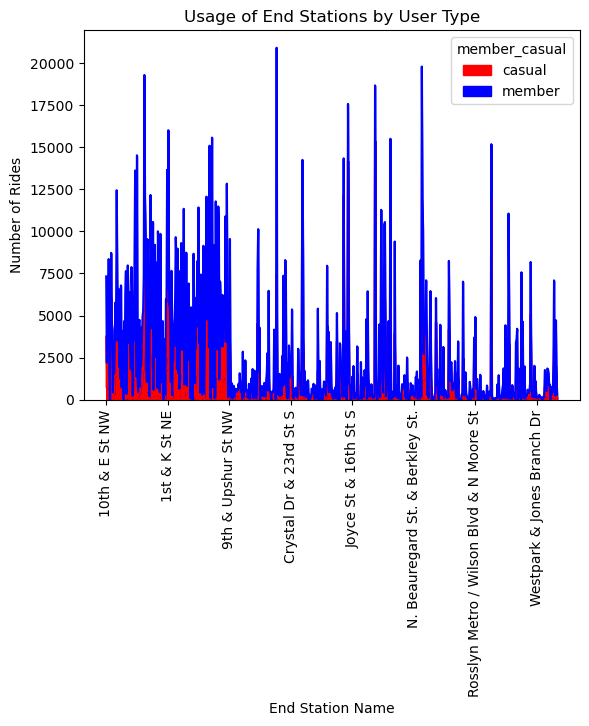

In [8]:
import matplotlib.pyplot as plt

station_usage = df.groupby(['end_station_name', 'member_casual']).size().reset_index(name='count')

pivot_table = station_usage.pivot(index = 'end_station_name',
                                  columns = 'member_casual',
                                  values = 'count').fillna(0)

pivot_table.plot.area(stacked = True, color = ['red', 'blue'])

plt.title('Usage of End Stations by User Type')
plt.xlabel('End Station Name')
plt.ylabel('Number of Rides')
plt.xticks(rotation = 'vertical')

plt.show()


Observing this data visualization, it is seen that member riders are frequentingthe same end stations, as the spikes in end station usage are grouped closer to each other towards the front end.
Although the use of end stations by casual riders is dispersed, but  spikes do not show preference for a particular end station area.


### Exercise 2

In the `stackechange_users` folder there are folders that contain files named `Users.csv`. The folder names indicate which stackexchange site the data is from. We need this data to be in a single table in order to do analysis, but there is no column in the `Users.csv` file that contains that information.

a) Create a DataFrame that contains all of the information from the `Users.csv` files in the `stackechange_users` folder. There needs to be a new column added named `site` that contains the name of the stackexchange site the data is from.

In [100]:
import os
import pandas as pd

dfs = []

for folder in os.listdir('stackexchange_users'):
    if folder.startswith('.'): 
        continue
    site_name = folder
    file_path = f'stackexchange_users/{folder}/Users.csv'
    
    df = pd.read_csv(file_path)
    df['site'] = site_name
    
    dfs.append(df)

df = pd.concat(dfs, ignore_index=True)
df

,Id,Reputation,CreationDate,DisplayName,LastAccessDate,Location,AboutMe,Views,UpVotes,DownVotes,AccountId,ProfileImageUrl,WebsiteUrl,site
0,-1,1,2016-08-02T00:14:10.580,Community,2016-08-02T00:14:10.580,on the server farm,"<p>Hi, I'm not really a person.</p>\r\n<p>I'm ...",130,1482,1537,-1.0,NaN,NaN,ai.stackexchange.com
1,1,101,2016-08-02T15:36:45.333,Adam Lear,2022-11-21T22:15:29.520,"New York, NY",\n<p>Developer at Stack Overflow focusing on p...,201,0,0,37099.0,https://i.stack.imgur.com/A8wSd.jpg,NaN,ai.stackexchange.com
2,2,101,2016-08-02T15:36:48.397,Nick Craver,2016-11-30T22:09:22.300,"Winston-Salem, NC",<p>I am a Principal Software Engineer at Micro...,11,0,0,7598.0,https://i.stack.imgur.com/nGCYr.jpg?s=128&g=1,https://nickcraver.com/blog/,ai.stackexchange.com
3,3,101,2016-08-02T15:38:01.633,Geoff Dalgas,2018-01-09T03:22:26.573,"Corvallis, OR, United States",<p>Dev #2 who helped create Stack Overflow cur...,12,0,0,2.0,https://i.stack.imgur.com/nDllk.png?s=128&g=1,http://stackoverflow.com,ai.stackexchange.com
4,4,2036,2016-08-02T15:38:21.100,Franck Dernoncourt,2022-10-22T19:35:28.413,NaN,"<p><a href=""https://stackexchange.com/users/16...",150,15,2,169656.0,https://i.stack.imgur.com/Z99mk.jpg?s=128&g=1,http://www.francky.me,ai.stackexchange.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1626548,374646,1,2022-12-04T21:21:40.917,Loading,2022-12-04T21:21:40.917,NaN,NaN,0,0,0,27145509.0,https://lh3.googleusercontent.com/a/ALm5wu1LwY...,NaN,stats.stackexchange.com
1626549,374647,1,2022-12-04T21:35:48.703,Sambakhshiii,2022-12-04T21:56:06.417,Canada,"<p>SamBakshiii is an independent artist, singe...",0,0,0,27145595.0,https://lh3.googleusercontent.com/a/ALm5wu1kAw...,https://open.spotify.com/artist/Sambakhshiii,stats.stackexchange.com
1626550,374648,1,2022-12-04T21:36:06.923,Saad,2022-12-04T21:36:06.923,NaN,NaN,0,0,0,27145598.0,NaN,NaN,stats.stackexchange.com
1626551,374649,1,2022-12-04T21:44:59.507,William Letsou,2022-12-04T22:00:16.397,NaN,NaN,0,0,0,27145650.0,https://lh3.googleusercontent.com/a/ALm5wu2RlF...,NaN,stats.stackexchange.com


b) Now that we have this information, we can see which users participate in the most sites by using the AccountId field to identify users across sites. Who are the top 10 users in terms of multi-site participation.

In [34]:
grouped = df.groupby("AccountId")
site = grouped["site"].nunique()
site = site.sort_values(ascending=False)

print(site.head(10))

top_10 = (
    df.set_index("AccountId")
    .loc[site.head(10).index, "DisplayName"]
    .drop_duplicates()
)

top_10

AccountId
-1.0           6
 13549.0       6
 3047892.0     6
 3051311.0     6
 13473.0       6
 3053387.0     6
 3053832.0     6
 11122832.0    6
 3073125.0     6
 15787293.0    6
Name: site, dtype: int64


AccountId
-1.0                          Community
 13549.0                         Gaurav
 3047892.0                  Pawel Troka
 3051311.0              Joshua Briefman
 13473.0                         Bill B
 3053387.0                          mc2
 3053832.0                        sfjac
 11122832.0                    Philippe
 3073125.0                 He Yifei 何一非
 15787293.0    Jose Alves Maciel Junior
Name: DisplayName, dtype: object

c) Which site has the most users that participate in other sites?

In [35]:
by_site = df.groupby("site")
count = by_site["AccountId"].nunique()
count = count.sort_values(ascending=False)

count.head(1)

site
math.stackexchange.com    979006
Name: AccountId, dtype: int64

### Exercise 3

This exercise is about intuitive and codable column names and setting the correct index. It uses the file `acs5yr-economic-by-state.csv`. The end state that we are aiming for is a DataFrame where the rows are indexed by the state name and the columns are readable and codable (we will chose a subset of columns to keep).

a) Import the data into a DataFrame and get a sense of the issues to be solved.

In [9]:
df = pd.read_csv('acs5yr-economic-by-state.csv')

df

,Label (Grouping),Alabama!!Total population!!Estimate,Alaska!!Total population!!Estimate,Arizona!!Total population!!Estimate,Arkansas!!Total population!!Estimate,California!!Total population!!Estimate,Colorado!!Total population!!Estimate,Connecticut!!Total population!!Estimate,Delaware!!Total population!!Estimate,District of Columbia!!Total population!!Estimate,...,Tennessee!!Total population!!Estimate,Texas!!Total population!!Estimate,Utah!!Total population!!Estimate,Vermont!!Total population!!Estimate,Virginia!!Total population!!Estimate,Washington!!Total population!!Estimate,West Virginia!!Total population!!Estimate,Wisconsin!!Total population!!Estimate,Wyoming!!Total population!!Estimate,Puerto Rico!!Total population!!Estimate
0,EMPLOYMENT STATUS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Population 16 years and over,"3,714,504","528,189","4,813,496","2,247,624","28,445,585","3,820,290","2,820,837","700,375","493,401",...,"4,919,958","18,380,464","1,907,903","509,527","6,216,349","5,186,380","1,498,611","4,458,387","429,389","2,931,640"
2,In labor force,"2,246,848","380,443","2,995,656","1,367,999","18,418,306","2,666,975","1,919,849","454,892","331,098",...,"3,098,473","12,065,652","1,319,947","350,953","4,188,053","3,432,213","824,270","3,078,465","300,640","1,382,421"
3,Civilian labor force,"2,230,879","363,357","2,975,166","1,360,938","18,274,871","2,636,627","1,910,905","451,137","328,036",...,"3,081,949","11,962,847","1,313,657","350,298","4,065,244","3,380,744","822,341","3,073,910","297,312","1,380,477"
4,Employed,"2,036,867","332,126","2,747,475","1,254,140","16,632,466","2,456,139","1,765,549","419,062","297,189",...,"2,816,637","11,125,616","1,236,803","329,676","3,824,131","3,124,821","763,691","2,869,310","284,148","1,149,431"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,18 years and over,(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
141,18 to 64 years,(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
142,65 years and over,(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
143,People in families,(X),(X),(X),(X),(X),(X),(X),(X),(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


b) Use the Pandas `transpose` function to make rotate the data.

In [10]:
df = df.transpose()

df

,0,1,2,3,4,5,6,7,8,9,...,135,136,137,138,139,140,141,142,143,144
Label (Grouping),EMPLOYMENT STATUS,Population 16 years and over,In labor force,Civilian labor force,Employed,Unemployed,Armed Forces,Not in labor force,Civilian labor force,Percent Unemployed,...,All people,Under 18 years,Related children under 18 years,Related children under 5 years,Related children 5 to 17 years,18 years and over,18 to 64 years,65 years and over,People in families,Unrelated individuals 15 years and over
Alabama!!Total population!!Estimate,NaN,"3,714,504","2,246,848","2,230,879","2,036,867","194,012","15,969","1,467,656","2,230,879",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Alaska!!Total population!!Estimate,NaN,"528,189","380,443","363,357","332,126","31,231","17,086","147,746","363,357",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Arizona!!Total population!!Estimate,NaN,"4,813,496","2,995,656","2,975,166","2,747,475","227,691","20,490","1,817,840","2,975,166",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Arkansas!!Total population!!Estimate,NaN,"2,247,624","1,367,999","1,360,938","1,254,140","106,798","7,061","879,625","1,360,938",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
California!!Total population!!Estimate,NaN,"28,445,585","18,418,306","18,274,871","16,632,466","1,642,405","143,435","10,027,279","18,274,871",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Colorado!!Total population!!Estimate,NaN,"3,820,290","2,666,975","2,636,627","2,456,139","180,488","30,348","1,153,315","2,636,627",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Connecticut!!Total population!!Estimate,NaN,"2,820,837","1,919,849","1,910,905","1,765,549","145,356","8,944","900,988","1,910,905",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Delaware!!Total population!!Estimate,NaN,"700,375","454,892","451,137","419,062","32,075","3,755","245,483","451,137",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
District of Columbia!!Total population!!Estimate,NaN,"493,401","331,098","328,036","297,189","30,847","3,062","162,303","328,036",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


c) Clean up the state names so that it is just the name of the state.

In [11]:
df = df.rename(index=lambda x: x.split('!!')[0])
cols = df.iloc[0]
df = df[1:]
df.columns = cols

df.to_csv('acs5yr-economic-by-state-cleaned.csv')
df

Label (Grouping),EMPLOYMENT STATUS,Population 16 years and over,In labor force,Civilian labor force,Employed,Unemployed,Armed Forces,Not in labor force,Civilian labor force,Percent Unemployed,...,All people,Under 18 years,Related children under 18 years,Related children under 5 years,Related children 5 to 17 years,18 years and over,18 to 64 years,65 years and over,People in families,Unrelated individuals 15 years and over
Alabama,NaN,"3,714,504","2,246,848","2,230,879","2,036,867","194,012","15,969","1,467,656","2,230,879",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Alaska,NaN,"528,189","380,443","363,357","332,126","31,231","17,086","147,746","363,357",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Arizona,NaN,"4,813,496","2,995,656","2,975,166","2,747,475","227,691","20,490","1,817,840","2,975,166",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Arkansas,NaN,"2,247,624","1,367,999","1,360,938","1,254,140","106,798","7,061","879,625","1,360,938",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
California,NaN,"28,445,585","18,418,306","18,274,871","16,632,466","1,642,405","143,435","10,027,279","18,274,871",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Colorado,NaN,"3,820,290","2,666,975","2,636,627","2,456,139","180,488","30,348","1,153,315","2,636,627",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Connecticut,NaN,"2,820,837","1,919,849","1,910,905","1,765,549","145,356","8,944","900,988","1,910,905",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Delaware,NaN,"700,375","454,892","451,137","419,062","32,075","3,755","245,483","451,137",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
District of Columbia,NaN,"493,401","331,098","328,036","297,189","30,847","3,062","162,303","328,036",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)
Florida,NaN,"14,988,197","9,187,180","9,128,081","8,317,203","810,878","59,099","5,801,017","9,128,081",(X),...,(X),(X),(X),(X),(X),(X),(X),(X),(X),(X)


d) The names of the columns aren't really intuitive or codable at this point and there are far too many of them.

```
INCOME AND BENEFITS (IN 2010 INFLATION-ADJUSTED DOLLARS)
    Total households
    Less than $10,000
    $10,000 to $14,999
    $15,000 to $24,999
    $25,000 to $34,999
    $35,000 to $49,999
    $50,000 to $74,999
    $75,000 to $99,999
    $100,000 to $149,999
    $150,000 to $199,999
    $200,000 or more
    Median household income (dollars)
    Mean household income (dollars)
```

In [12]:
column_names = df.columns.str.strip()
df.columns = column_names

cols = ['Total households',
                    'Less than $10,000',
                    '$10,000 to $14,999',
                    '$15,000 to $24,999',
                    '$25,000 to $34,999',
                    '$35,000 to $49,999',
                    '$50,000 to $74,999',
                    '$75,000 to $99,999',
                    '$100,000 to $149,999',
                    '$150,000 to $199,999',
                    '$200,000 or more',
                    'Median household income (dollars)',
                    'Mean household income (dollars)']
df = df.loc[:, cols]

new_names = {'Total households' : 'total_households',
             'Less than $10,000' : 'lt_10k',
             '$10,000 to $14,999' : '10k_to_15k',
             '$15,000 to $24,999' : '15k_to_25k',
             '$25,000 to $34,999' : '25k_to_35k',
             '$35,000 to $49,999' : '35k_to_50k',
             '$50,000 to $74,999' : '50k_to_75k',
             '$75,000 to $99,999' : '75k_to_100k',
             '$100,000 to $149,999' : '100k_to_150k',
             '$150,000 to $199,999' : '150k_to_200k',
             '$200,000 or more' : 'gt_200k',
             'Median household income (dollars)' : 'median_income',
             'Mean household income (dollars)' : 'mean_income'}

df

Label (Grouping),Total households,"Less than $10,000","Less than $10,000","$10,000 to $14,999","$10,000 to $14,999","$15,000 to $24,999","$15,000 to $24,999","$25,000 to $34,999","$25,000 to $34,999","$35,000 to $49,999",...,"$75,000 to $99,999","$75,000 to $99,999","$100,000 to $149,999","$100,000 to $149,999","$150,000 to $199,999","$150,000 to $199,999","$200,000 or more","$200,000 or more",Median household income (dollars),Mean household income (dollars)
Alabama,"1,821,210","186,689","77,266","130,766","51,661","242,846","134,411","213,143","135,455","268,333",...,"192,900","166,186","170,962","153,299","51,342","46,689","42,321","38,397","42,081","57,655"
Alaska,"248,248","9,768","4,604","9,499","3,721","18,795","9,018","22,086","12,872","31,304",...,"37,780","28,484","44,627","36,112","15,578","13,446","11,313","9,781","66,521","82,091"
Arizona,"2,326,468","163,071","74,956","119,317","50,324","251,762","130,609","263,031","155,780","355,659",...,"286,189","222,237","275,283","224,768","85,914","72,658","79,797","68,570","50,448","67,436"
Arkansas,"1,117,154","110,110","44,829","86,244","35,009","161,759","93,379","145,279","94,332","175,890",...,"108,197","93,643","86,543","77,578","24,030","21,831","20,659","18,561","39,267","53,253"
California,"12,392,852","658,672","329,646","631,056","259,632","1,173,282","698,102","1,133,156","721,699","1,568,638",...,"1,586,032","1,162,671","1,861,933","1,459,066","790,965","645,076","805,172","669,201","60,883","83,483"
Colorado,"1,918,959","122,798","47,570","89,897","32,218","183,803","86,354","186,995","97,374","267,520",...,"252,226","192,828","269,372","221,069","96,480","83,859","86,593","76,094","56,456","75,264"
Connecticut,"1,359,218","73,564","28,163","55,426","18,987","112,550","48,016","107,632","57,101","157,126",...,"188,102","142,615","226,765","190,257","93,104","81,689","109,973","97,797","67,740","94,306"
Delaware,"331,639","18,898","7,508","13,452","4,589","31,324","15,607","32,928","19,589","46,063",...,"45,734","36,132","47,732","40,505","17,093","14,866","12,914","11,317","57,599","74,703"
District of Columbia,"257,317","28,142","9,272","12,497","4,147","20,818","7,986","20,700","8,905","30,390",...,"28,497","10,769","32,971","15,110","18,488","10,453","24,605","16,211","58,526","91,778"
Florida,"7,152,844","519,226","204,161","403,434","157,404","846,055","438,372","844,508","499,779","1,114,103",...,"820,638","641,541","751,498","618,077","245,316","207,032","256,252","216,075","47,661","66,323"
